# Plotting with pandas

Here we will learn about pandas built-in capabilities for data visualization! It's built-off of matplotlib, but it baked into pandas and is much easier to use!  

## Plot Types

There are several plot types built-in to pandas, most of them statistical plots by nature:
  
* df.plot.line
* df.plot.bar      
* df.plot.pie
* df.plot.scatter
* ...   

You can also just call df.plot(kind='pie') or replace that kind argument with any of the key terms shown in the list above (e.g. 'line','pie', etc..)

As always, first import Pandas.

In [1]:
import pandas as pd
%matplotlib inline

## Line Plots in Series

You can see a simple example of a line plot with for a Series object. 
We use a simple Python list "data" as the data for the range. 
The index will be used for the x values, or the domain.

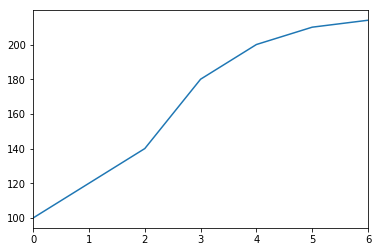

In [3]:
data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data)
s.plot()

Let's experiment with a Series which has an index consisting of 
alphabetical values.

Note `xticks=range(len(S.index))`, which is required for having index values being placed on X axis. Seems to be due to a pandas bug described in [issue 22334](https://github.com/pandas-dev/pandas/issues/22334).

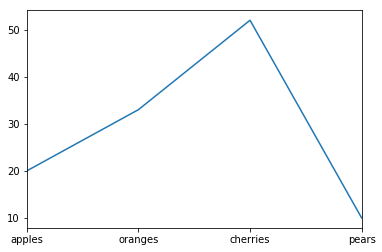

In [4]:
fruits = ['apples', 'oranges', 'cherries', 'pears']
quantities = [20, 33, 52, 10]
S = pd.Series(quantities, index=fruits)
S.plot(xticks=range(len(S.index)))

## Line Plots in DataFrames

We will introduce now the plot method of a DataFrame. We define a dictionary 
with the population and area figures. This dictionary can be used to create 
the DataFrame, which we want to use for plotting:

In [5]:
cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "area" : [1572, 891.85, 605.77, 1285, 
                    105.4, 414.6, 228, 755, 
                    525.2, 517, 101.9, 310.4, 
                    181.8]
}
city_frame = pd.DataFrame(cities,
                          columns=["population", "area"],
                          index=cities["name"])
print(city_frame)

           population     area
London        8615246  1572.00
Berlin        3562166   891.85
Madrid        3165235   605.77
Rome          2874038  1285.00
Paris         2273305   105.40
Vienna        1805681   414.60
Bucharest     1803425   228.00
Hamburg       1760433   755.00
Budapest      1754000   525.20
Warsaw        1740119   517.00
Barcelona     1602386   101.90
Munich        1493900   310.40
Milan         1350680   181.80


The following code plots our DataFrame city_frame. We will multiply the area 
column by 1000, because otherwise the "area" line would not be visible or in 
other words would be overlapping with the x axis

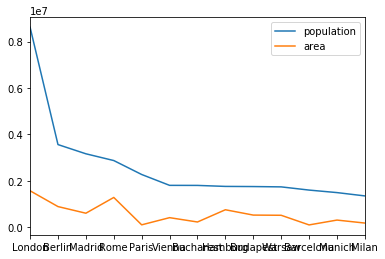

In [6]:
city_frame["area"] *= 1000
city_frame.plot(xticks=range(len(city_frame.index)))

We can change this by defining the xticks explicitly with `range(len((city_frame.index))`.

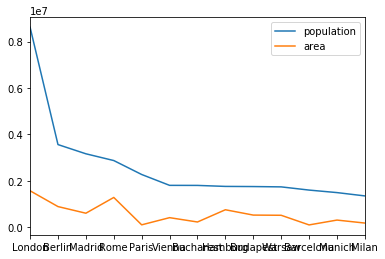

In [7]:
city_frame.plot(xticks=range(len(city_frame.index)))

Rotate X axis labels to prevent them from overlapping

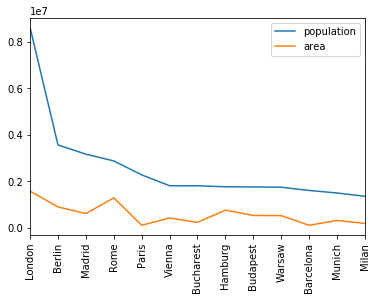

In [8]:
city_frame.plot(xticks=range(len(city_frame.index)),
                rot=90)

## Using matplotlib directly for advanced plotting

Following example is provided in order to show that for advanced plotting features a deeper understanding of unrelying matplotlib library is required. It is ok if you do not understand the whole code here. matplotlib will covered later.

We multiplied the area column by 1000 to get a proper output. Instead of this, 
we could have used twin axes. We will demonstrate this in the following 
example. We will recreate the city_frame DataFrame to get the original area 
column.

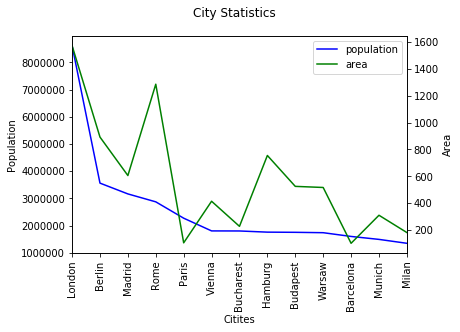

In [9]:
# recreating the DataFrame
city_frame = pd.DataFrame(cities, columns=["population", "area"],
                          index=cities["name"])
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.suptitle("City Statistics")
ax.set_ylabel("Population")
ax.set_xlabel("Citites")
ax2 = ax.twinx()
ax2.set_ylabel("Area")
city_frame["population"].plot(ax=ax, style="b", use_index=True, 
                              xticks=range(len(city_frame.index)),
                              rot=90)
city_frame["area"].plot(ax=ax2, style="g", use_index=True, 
                        rot=90)
ax2.legend([ax.get_lines()[0], ax2.get_lines()[0]], ['population', 'area'])

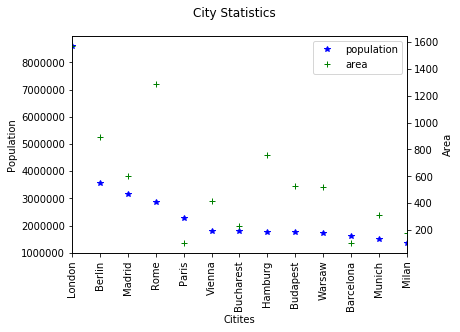

In [10]:
# recreating the DataFrame
city_frame = pd.DataFrame(cities, columns=["population", "area"],
                          index=cities["name"])
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.suptitle("City Statistics")
ax.set_ylabel("Population")
ax.set_xlabel("Citites")
ax2 = ax.twinx()
ax2.set_ylabel("Area")
city_frame["population"].plot(ax=ax, style="b*", use_index=True, 
                              xticks=range(len(city_frame.index)),
                              rot=90)
city_frame["area"].plot(ax=ax2, style="g+", use_index=True, 
                        rot=90)
ax2.legend([ax.get_lines()[0], ax2.get_lines()[0]], ['population', 'area'])

### Bar plot

Bar plot is a plot that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. 

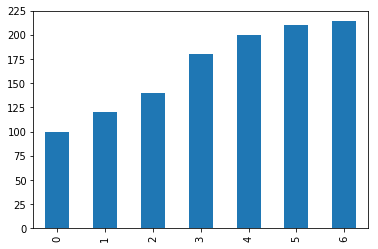

In [11]:
data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data, index=range(len(data)))
s.plot(kind="bar")

### Pie plot

A pie chart (or a circle chart) is a circular statistical graphic which is divided into slices to illustrate numerical proportion.

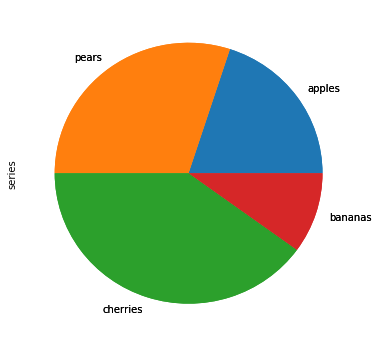

In [16]:
fruits = ['apples', 'pears', 'cherries', 'bananas']
s_2 = pd.Series([20, 30, 40, 10], 
                   index=fruits, 
                   name='series')
s_2.plot(kind='pie', figsize=(6, 6))
# same as 
s_2.plot.pie(figsize=(6, 6))

### Scatter plot

Scatter plot is a plot in which the values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.

In [17]:
raw_data = \
       {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
        'gender': ['male', 'female', 'male' , 'male', 'female'],
        'age': [42, 52, 36, 24, 73],
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}
data = pd.DataFrame(raw_data, columns = ['first_name', 
                                         'last_name', 
                                         'age', 'gender', 
                                         'preTestScore', 
                                         'postTestScore'])

print(data.head())

  first_name last_name  age  gender  preTestScore  postTestScore
0      Jason    Miller   42    male             4             25
1      Molly  Jacobson   52  female            24             94
2       Tina       Ali   36    male            31             57
3       Jake    Milner   24    male             2             62
4        Amy     Cooze   73  female             3             70


Scatter plot of preTestScore and postTestScore, with the size of each point  determined by age

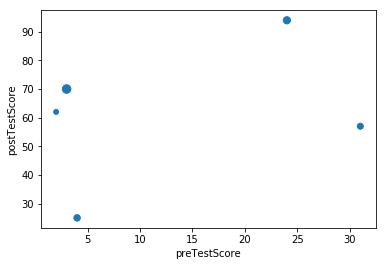

In [18]:
data.plot.scatter(x='preTestScore', 
                  y='postTestScore', 
                  s=data.age)

Scatter plot of preTestScore and postTestScore, with the size of each point determined by age and color by gender

In [ ]:
data.plot.scatter(x='preTestScore', 
                  y='postTestScore', 
                  s=data.age*10,
                  c=data.gender.apply(
                          lambda x: 'blue' 
                              if x == 'male' 
                              else 'red'))